In [11]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from load_data.load_data import load_data #will not work until we packaged the project
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = get_data('raw_data')

def initialize_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(255, 255, 1)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))
    
    return model

ImportError: attempted relative import with no known parent package

In [4]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             


2023-02-25 16:42:43.135823: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        8256      
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 100)               6150500   
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
          

In [5]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

model = initialize_model()
model = compile_model(model)

es = EarlyStopping(patience = 5, verbose = 1)

history = model.fit(X_train, y_train_cat, 
                    validation_split = 0.3,
                    callbacks = [es], 
                    epochs = 100, 
                    batch_size = 64)

Epoch 1/100
32/32 [==============================] - 50s 1s/step - loss: 101.8887 - accuracy: 0.2923 - val_loss: 1.2750 - val_accuracy: 0.3260
Epoch 2/100
32/32 [==============================] - 45s 1s/step - loss: 1.2798 - accuracy: 0.3645 - val_loss: 1.2405 - val_accuracy: 0.4234
Epoch 3/100
32/32 [==============================] - 48s 2s/step - loss: 1.1687 - accuracy: 0.4661 - val_loss: 1.0567 - val_accuracy: 0.6125
Epoch 4/100
32/32 [==============================] - 48s 1s/step - loss: 1.0232 - accuracy: 0.5488 - val_loss: 0.9398 - val_accuracy: 0.6705
Epoch 5/100
32/32 [==============================] - 45s 1s/step - loss: 0.8744 - accuracy: 0.6116 - val_loss: 0.7929 - val_accuracy: 0.7239
Epoch 6/100
32/32 [==============================] - 44s 1s/step - loss: 0.7961 - accuracy: 0.6604 - val_loss: 0.7211 - val_accuracy: 0.7181
Epoch 7/100
32/32 [==============================] - 45s 1s/step - loss: 0.6966 - accuracy: 0.6907 - val_loss: 0.5993 - val_accuracy: 0.7738
Epoch 8/100

In [11]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

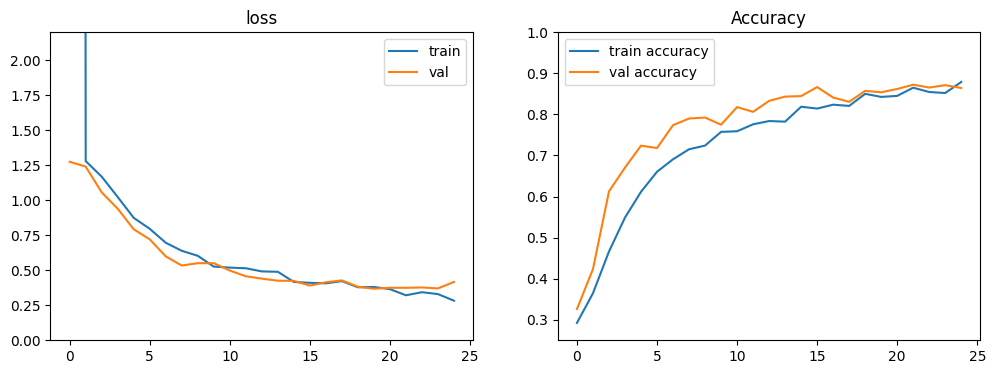

In [12]:
plot_history(history)

In [15]:
y_test_cat = to_categorical(y_test)
model.evaluate(X_test, y_test_cat)

13/13 [==============================] - 2s 156ms/step - loss: 2.4228 - accuracy: 0.5914


[2.4228434562683105, 0.5913705825805664]